### Imports

In [92]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mog_model import *
from matplotlib import gridspec
from utils.plot_helper import errorbar_plot
#plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/ggplot_sam.mplstyle')
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/dark_jupyter.mplstyle')

#plt.rc('markersize=3')
plt.rc('text', usetex=False)
#plt.rcParams['xtick.color'] = 'k'
#plt.rcParams['ytick.color'] = 'k'
#plt.rcParams['axes.labelcolor'] = 'k'
#plt.rcParams['text.usetex'] = False
plt.rcParams['errorbar.capsize'] = 0
%matplotlib notebook
#%matplotlib inline
%autoreload 2

#### Helper functions

In [93]:
def fix_legends(axes):
    if isinstance(axes, (np.ndarray, list)):
        legends = [ax.get_legend() for ax in axes]
        for leg in legends:
            leg.texts[0].set_color('w')
    else:
        legend = axes.get_legend()
        for idx in range(len(legend.texts)):
            legend.texts[idx].set_color('w')
    return axes

In [94]:
def add_vline(axes, x, **kwargs):
    if isinstance(axes, (np.ndarray, list)):
        for ax in axes:
            ax.axvline(x, **kwargs)
                       #, color='C3', ls=':', lw=2.)
    else:
        axes.axvline(x, **kwargs)
    return axes

In [95]:
def fix_ticks(axes):
    if isinstance(axes, (np.ndarray, list)):
        for idx in range(len(axes)):
            axes[idx].tick_params(which='both', color='#474747', labelcolor='k')
            #_y = axes[idx].set_yticklabels(axes[idx].get_yticklabels('both'), 
            #                               {'color': 'k'})
            #_x = axes[idx].set_xticklabels(axes[idx].get_xticklabels('both'), 
            #                               {'color': 'k'})
    else:
        axes.tick_params(which='both', color='#474747', labelcolor='k')
        #_y = axes.set_yticklabels(axes.get_yticklabels(), {'color': 'k'})
        #_x = axes.set_xticklabels(axes.get_xticklabels(), {'color': 'k'})

### Define data_dir and load data

In [96]:
run_dir = '../log_mog_tf/run_231/'
data_dir = run_dir + 'run_info/'
figs_dir = run_dir + 'figures1/'
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

In [97]:
with open(data_dir + '_init_params.pkl', 'rb') as f:
    _params = pickle.load(f)
with open(data_dir + 'tunneling_rates.pkl', 'rb') as f:
    tunneling_rates = pickle.load(f)
with open(data_dir + 'acceptance_rates.pkl', 'rb') as f:
    acceptance_rates = pickle.load(f)
with open(data_dir + 'tunneling_rates_highT.pkl', 'rb') as f:
    tunneling_rates_highT = pickle.load(f)
with open(data_dir + 'acceptance_rates_highT.pkl', 'rb') as f:
    acceptance_rates_highT = pickle.load(f)
with open(data_dir + 'distances.pkl', 'rb') as f:
    distances = pickle.load(f)
with open(data_dir + 'distances_highT.pkl', 'rb') as f:
    distances_highT = pickle.load(f)

In [98]:
get_vals_as_arr = lambda _dict: np.array(list(_dict.values()))

tr0 = get_vals_as_arr(tunneling_rates)
tr1 = get_vals_as_arr(tunneling_rates_highT)

ar0 = get_vals_as_arr(acceptance_rates)
ar1 = get_vals_as_arr(acceptance_rates_highT)

d0 = get_vals_as_arr(distances)
d1 = get_vals_as_arr(distances_highT)

steps_arr = []
temp_arr = []
for key in tunneling_rates_highT.keys():
    steps_arr.append(key[0]+1)
    temp_arr.append(key[1])

In [99]:
x_steps = 3 * [steps_arr]
x_temps = 3 * [temp_arr]

y_data = [tr0[:, 0], ar0[:, 0], d0[:, 0]]
y_err = [tr0[:, 1], ar1[:, 1], d1[:, 1]]

y_data_highT = [tr1[:, 0], ar1[:, 0], d1[:, 0]]

y_err_highT = [tr1[:, 1], ar1[:, 1], d1[:, 1]]

str0 = (f"{_params['num_distributions']} in {_params['x_dim']} dims; ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}}),$'.format(_params['sigma']))
#  prefix = str0 + str1
title = str0 + str1 + r'$T_{trajectory} = 1$'
title_highT = str0 + str1 + r'$T_{trajectory} > 1$'
#  def out_file(f, s): return self.figs_dir + f'{f}_{s+1}.pdf'
def out_file(f): return figs_dir + f'{f}.pdf'

kwargs = {
    'fillstyle': 'full',
    'markersize': 3,
    'alpha': 1.,
    'capsize': 0,
    'capthick': 0,
    'x_label': 'Training step',
    'y_label': '',
    'legend_labels': ['Tunneling rate',
                      'Acceptance rate',
                      'Distance / step'],
    'title': title,
    'grid': True,
    'reverse_x': False,
}

### $(T = 1)$ Tunneling rate, Acceptance Rate and Avg. Distance vs. Training Step 

In [100]:
%matplotlib notebook

<IPython.core.display.Javascript object>


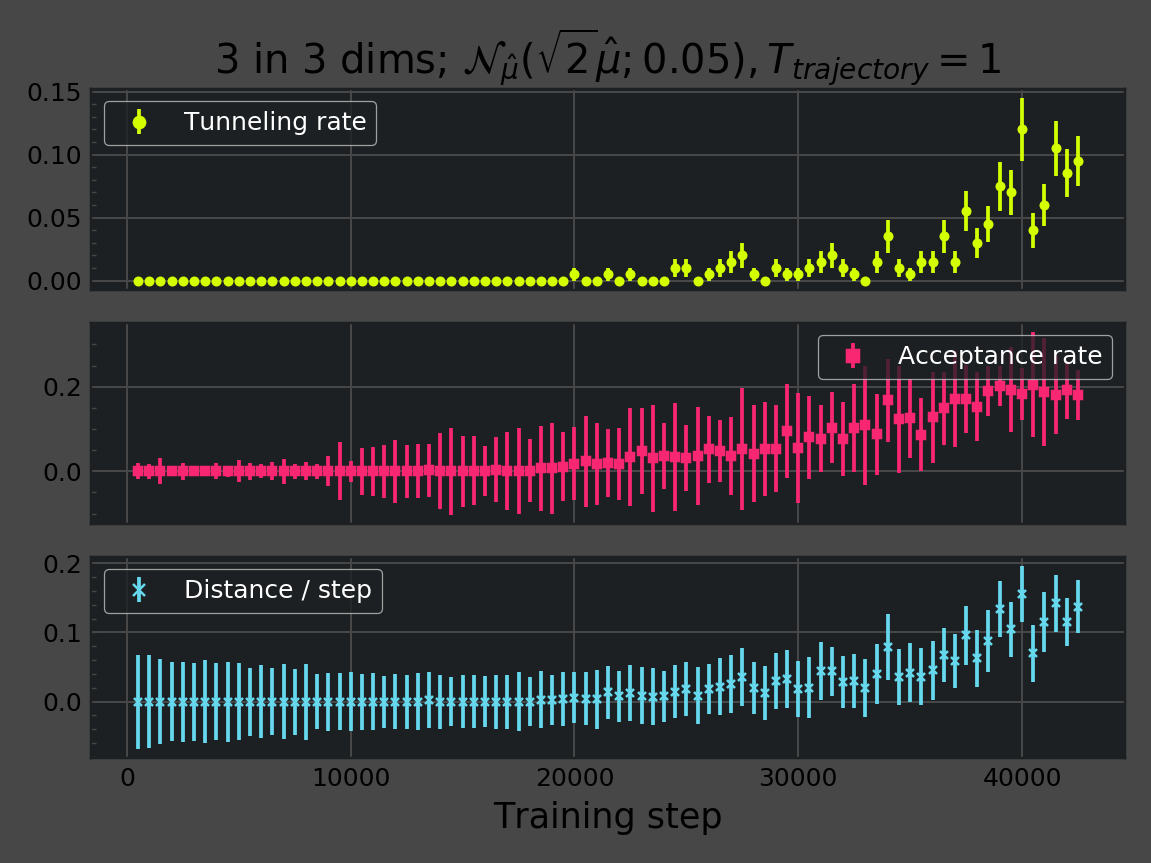

Saving figure to: ../log_mog_tf/run_231/figures1/tr_ar_dist_steps_lowT.pdf


In [101]:
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/dark_jupyter.mplstyle')
plt.rcParams['legend.facecolor'] = '#1c2022'
out_file0 = out_file('tr_ar_dist_steps_lowT')#, step)
fig, axes = errorbar_plot(x_steps, y_data, y_err, out_file=out_file0, **kwargs)
_ = fix_legends(axes)
_ = fix_ticks(axes)
#_ = [ax.set_ytick_labels(ax.get_yticklabels(), {'color': 'k'}) for ax in axes]
#axes[0].set_yticklabels(axes[0].get_yticklabels(), {'color': 'k'})
sfig = fig.savefig(out_file0, dpi=400, bbox_inches='tight')

### $(T > 1)$ Tunneling rate, Acceptance Rate and Avg. Distance vs. Training Step 

<IPython.core.display.Javascript object>


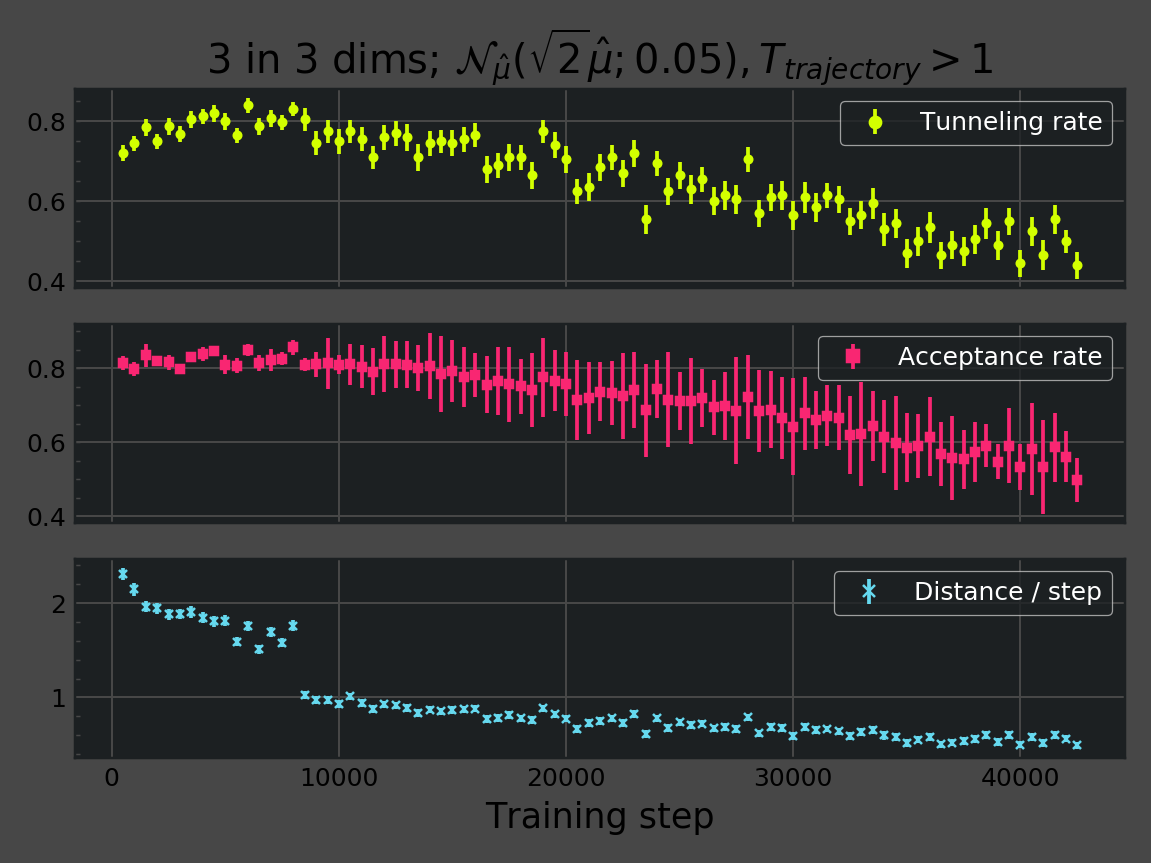

Saving figure to: ../log_mog_tf/run_231/figures1/tr_ar_dist_steps_highT.pdf


In [102]:
# for trajectories with temperature > 1 vs. STEP
out_file1 = out_file('tr_ar_dist_steps_highT')#, step)
kwargs1 = kwargs.copy()
kwargs1['title'] = title_highT
fig, axes = errorbar_plot(x_steps, y_data_highT, y_err_highT,
              out_file=out_file1, **kwargs1)
axes = fix_legends(axes)
_ = fix_ticks(axes)
fig.savefig(out_file1, dpi=400, bbox_inches='tight')

### $(T = 1)$ Tunneling rate, Acceptance Rate and Avg. Distance vs. Temperature

<IPython.core.display.Javascript object>


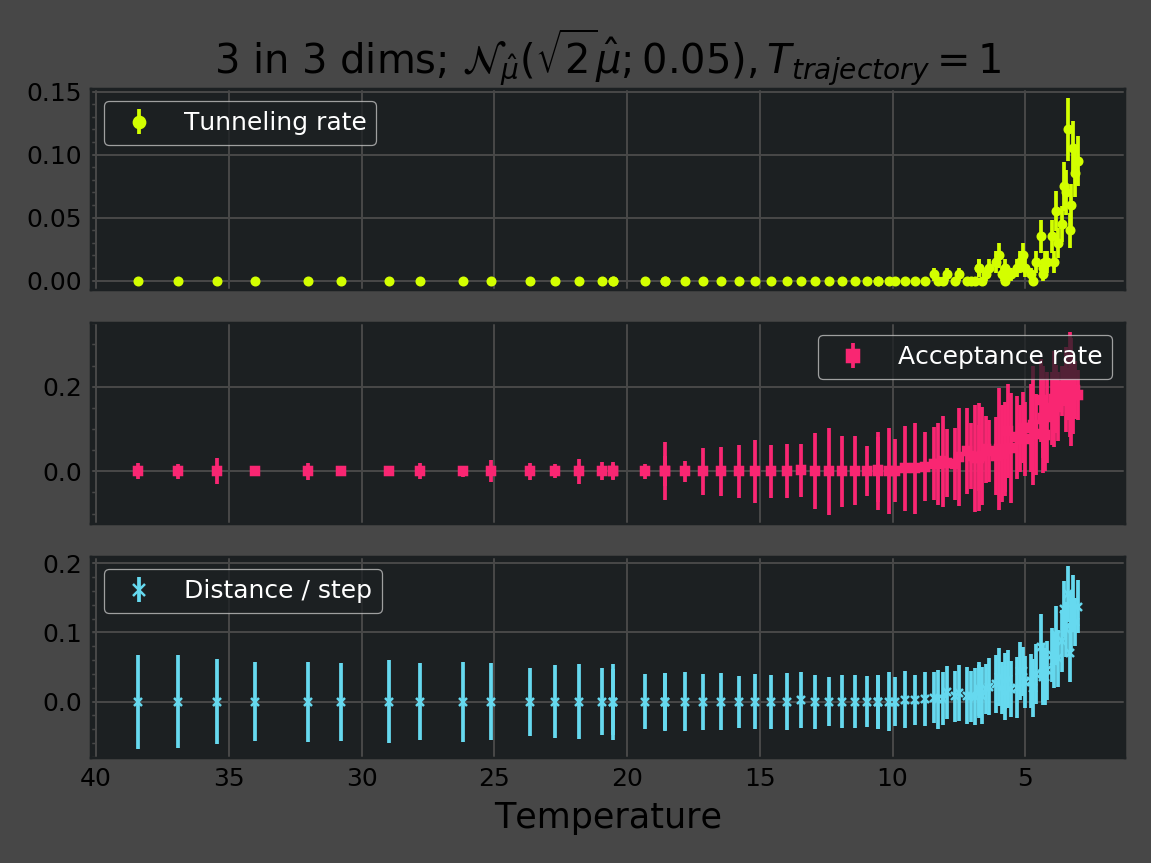

Saving figure to: ../log_mog_tf/run_231/figures1/tr_ar_dist_temps_lowT.pdf


In [103]:
out_file2 = out_file('tr_ar_dist_temps_lowT')#, step)
# for trajectories with temperature = 1. vs TEMP
kwargs2 = kwargs.copy()
kwargs2['x_label'] = 'Temperature'
kwargs2['title'] = title
kwargs2['reverse_x'] = True
fig, axes = errorbar_plot(x_temps, y_data, y_err,
                          out_file=out_file2, **kwargs2)
_ = fix_legends(axes)
_ = fix_ticks(axes)
_ = add_vline(axes, 1, **{'color': 'C6', 'ls': '-', 'lw': 2.})
#axes[-1].set_xlim((15, 0.5))
fig.savefig(out_file2, dpi=400, bbox_inches='tight')
#ax.set_xlim(15, 1.05)

### $(T > 1)$ Tunneling rate, Acceptance Rate and Avg. Distance vs. Temperature

<IPython.core.display.Javascript object>


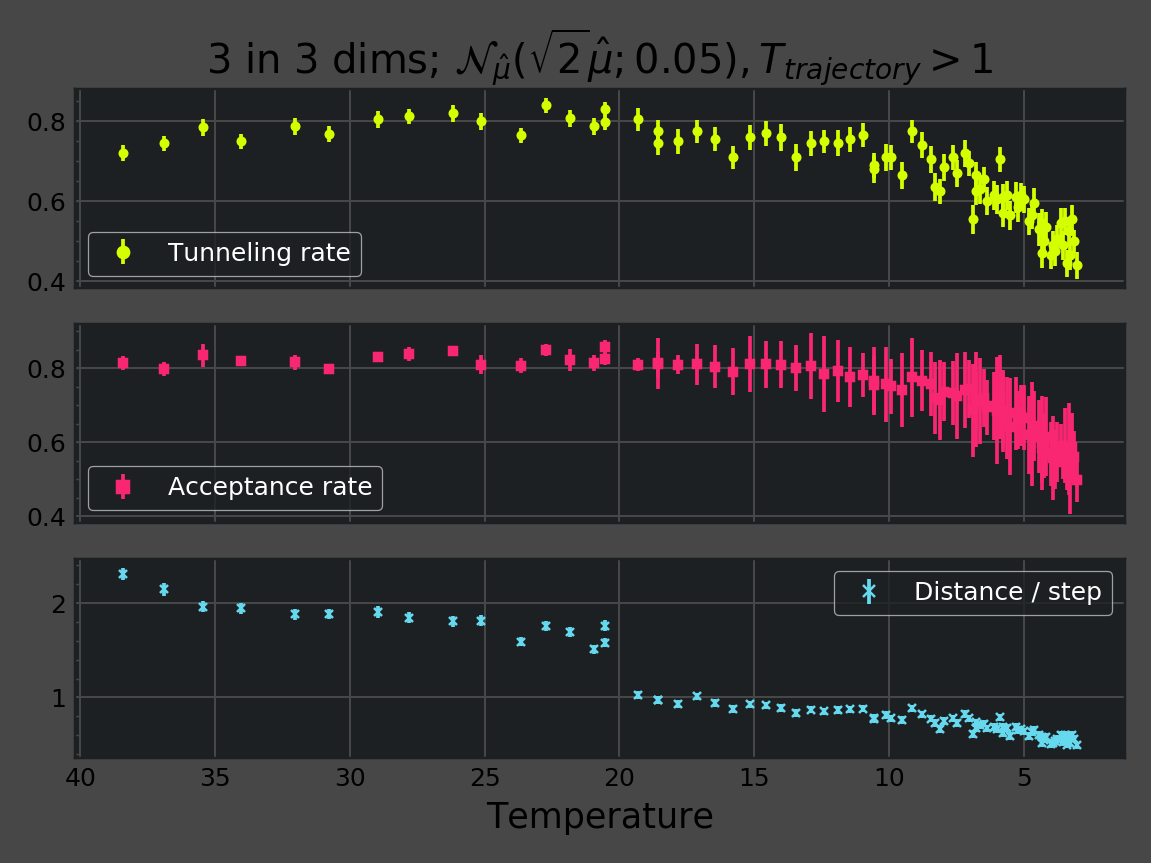

Saving figure to: ../log_mog_tf/run_231/figures1/tr_ar_dist_temps_highT.pdf


In [104]:
out_file3 = out_file('tr_ar_dist_temps_highT')#, step)
# for trajectories with temperature > 1. vs TEMP
kwargs3 = kwargs.copy()
kwargs3['title'] = title_highT
kwargs3['x_label'] = 'Temperature'
kwargs3['reverse_x'] = True
fig, axes = errorbar_plot(x_temps, y_data_highT, y_err_highT,
                        out_file=out_file3, **kwargs3)
_ = add_vline(axes, 1, **{'color': 'C6', 'ls': '-', 'lw': 2.})
    
axes = fix_legends(axes)
_ = fix_ticks(axes)
fig.savefig(out_file3, dpi=400, bbox_inches='tight')
#axes[-1].set_xlim(10, 0.9)

### Annealing Schedule

In [105]:
temp0 = _params['temp_init']
steps = np.arange(0, max(steps_arr))
annealing_factor = _params['annealing_factor']
annealing_steps = _params['annealing_steps']
tunneling_steps = _params['tunneling_rate_steps']
fixed_temps = []
fixed_steps = []
temp = temp0
for step in steps:
    if step % annealing_steps == 0:
        tt  = temp * annealing_factor
        if tt > 1:
            temp = tt
    if (step+1) % tunneling_steps == 0:
        fixed_steps.append(step+1)
        fixed_temps.append(temp)

<IPython.core.display.Javascript object>


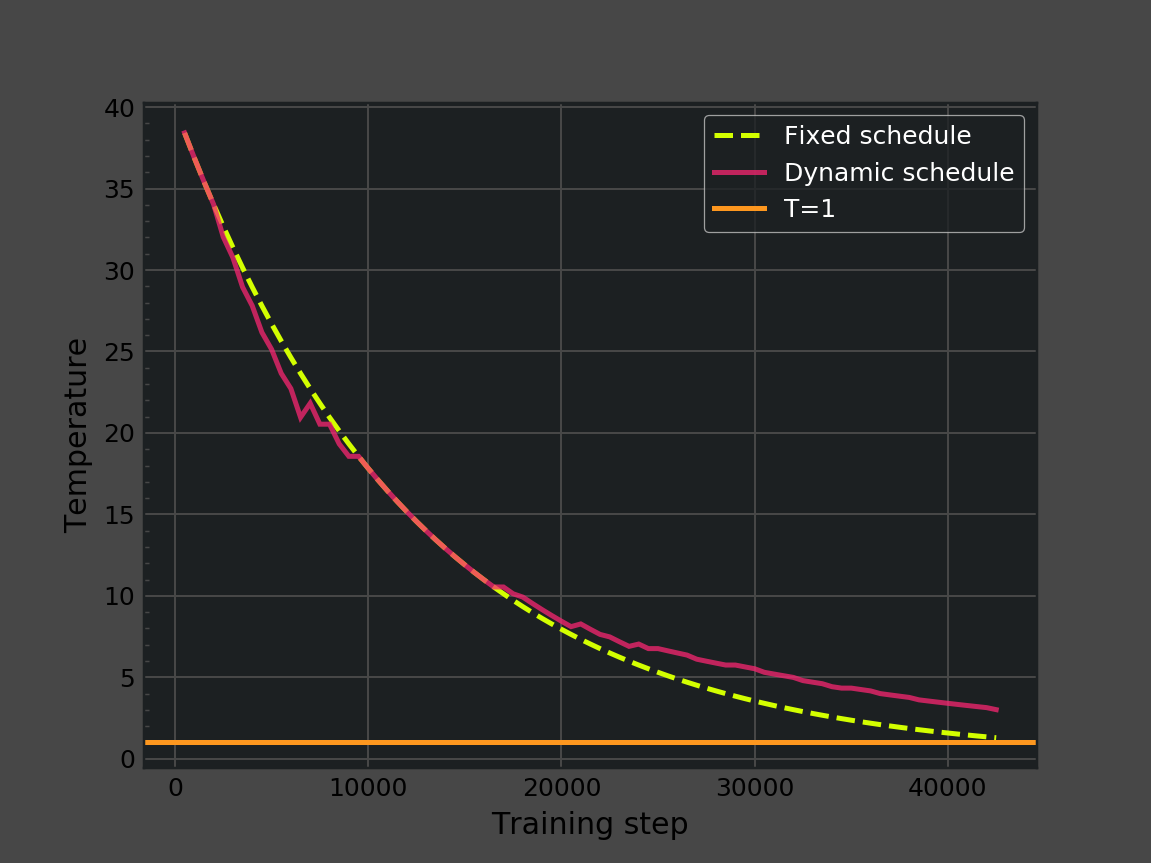

In [106]:
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/dark_jupyter.mplstyle')
fig, ax = plt.subplots()
pt = ax.plot(fixed_steps, fixed_temps, ls='--', label='Fixed schedule', lw=2)
pt = ax.plot(steps_arr, temp_arr, label='Dynamic schedule', lw=2., alpha=0.75)
hl = ax.axhline(y=1., color='C6', ls='-', lw=2., label='T=1')
xl = ax.set_xlabel('Training step')
yl = ax.set_ylabel('Temperature')
lg = ax.legend(loc='best')
_ = fix_legends(ax)
#ylabels = ax.get_yticklabels()
#xlabels = ax.get_xticklabels()
#ax.set_yticklabels(ylabels, {'color': 'k'})
#ax.set_xticklabels(xlabels, {'color': 'k'})
#ax.set_yticklabels(ax.get_yticklabels(), {'color': 'k'})
#ax.set_xticklabels(ax.get_xticklabels(), {'color': 'k'})
_ = fix_ticks(ax)

plt.savefig(figs_dir + 'annealing_schedule.pdf', dpi=400, bbox_inches='tight')